In [18]:
%matplotlib inline
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
import warnings
warnings.simplefilter('ignore')

In [4]:
hour = 18
all_files = glob.glob(os.path.join(os.getcwd() + "/graphs/", "power*%sH.csv" % hour))
dfs = []
for filename in all_files:
        dfs.append(pd.read_csv(filename))

In [5]:
df = pd.DataFrame(columns=['in','out', 'influence'])
for dt_frame in dfs:
    df = df.merge(dt_frame.loc[:,['in','out','influence']], how = 'outer', on = ['in','out'])

In [6]:
df.isna().all()
df = df.iloc[:,1:]
df = df.fillna(0)

In [21]:
sample = df[(df.iloc[:,2:] > 0).sum(axis=1) >2]

In [22]:
sample[sample.iloc[:,2:].apply(lambda x: adfuller(x.values)[1], axis=1) <= 0.05]

,in,out,influence_y,influence_x,influence_y,influence_x,influence_y,influence_x,influence_y,influence_x,influence_y,influence_x,influence_y
100,111586252,4039511540,0.0,0.0,0.0,0.0,0.319487,0.118272,0.190113,0.0,0.098551,0.080409,0.100484


In [23]:
result = seasonal_decompose(sample.iloc[:,2:].T.values,freq=1, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

[0.         0.         0.         0.         0.31948674 0.11827221
 0.1901126  0.         0.09855077 0.08040912 0.10048429]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.         0.         0.         0.         0.31948674 0.11827221
 0.1901126  0.         0.09855077 0.08040912 0.10048429]


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


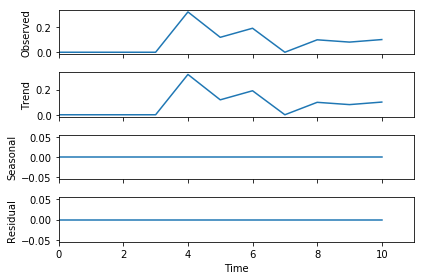

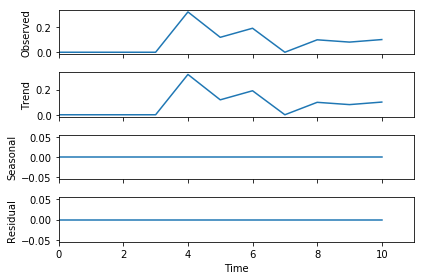

In [39]:
result = seasonal_decompose(sample.iloc[:,2:].T.values,freq=1, model='additive')
print(result.seasonal)
result.plot()

In [70]:
result = seasonal_decompose(df.iloc[:,2:].T.values,freq=1, model='additive')
result.seasonal[np.apply_along_axis(sum,1,result.seasonal) >0]

array([], shape=(0, 245), dtype=float64)